## CNN 실습

In [32]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.layers import Dropout

In [2]:
import matplotlib.pyplot as plt

# 모델 학습
def history_plot(history):
  # 훈련 손실 및 검증 손실 그래프
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Train and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # 훈련 정확도 및 검증 정확도 그래프
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Train and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


In [1]:



# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# 이미지 전처리 함수 정의
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image /= 255.0
    return image, label

# 데이터셋 전처리 및 배치 설정
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteJTTEGK/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/5
582/582 [==============================] - 46s 66ms/step - loss: 0.5761 - accuracy: 0.6918 - val_loss: 0.4907 - val_accuracy: 0.7749
Epoch 2/5
582/582 [==============================] - 36s 61ms/step - loss: 0.4440 - accuracy: 0.7951 - val_loss: 0.4788 - val_accuracy: 0.7898
Epoch 3/5
582/582 [==============================] - 42s 70ms/step - loss: 0.3731 - accuracy: 0.8343 - val_loss: 0.4032 - val_accuracy: 0.8212
Epoch 4/5
582/582 [==============================] - 43s 73ms/step - loss: 0.2971 - accuracy: 0.8738 - val_loss: 0.5496 - val_accuracy: 0.7691
Epoch 5/5
582/582 [==============================] - 37s 62ms/step - loss: 0.2039 - accuracy: 0.9159 - val_loss: 0.5100 - val_accuracy: 0.8134


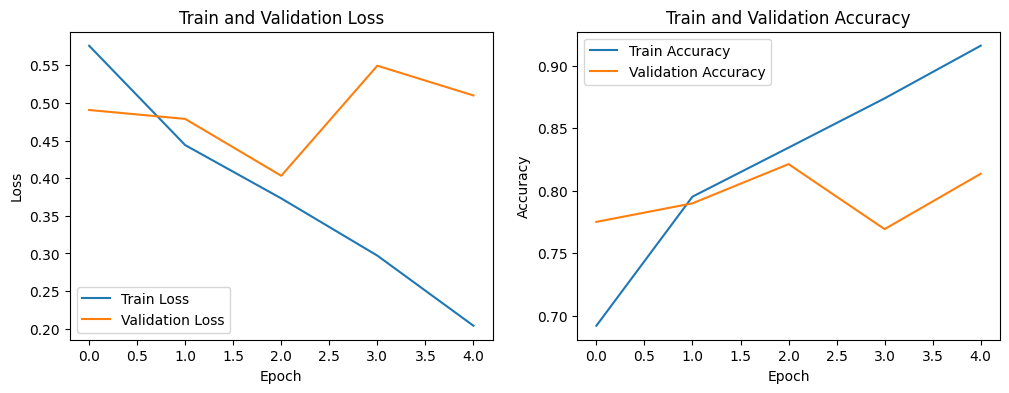

In [3]:
history_plot(history)

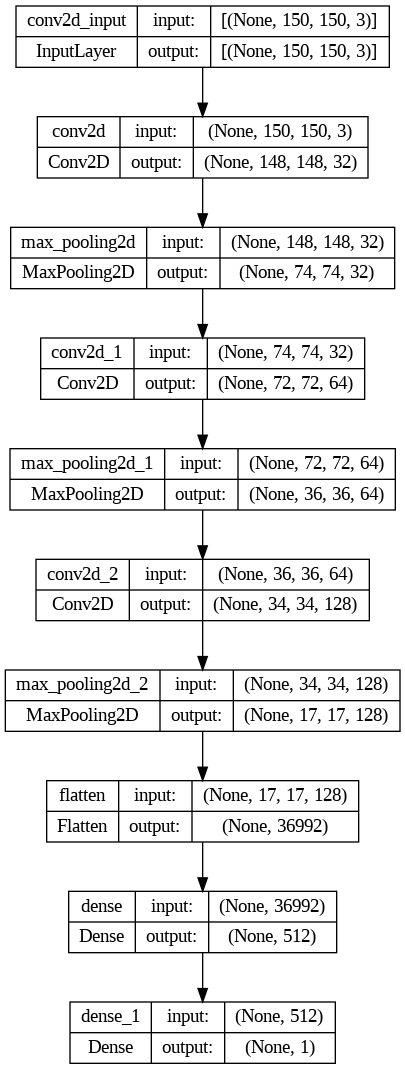

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# import numpy as np

# # 모델 학습
# history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# # 테스트 데이터에서 5개의 이미지 및 모델이 분류한 결과 출력
# sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))

# # 모델 평가
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

# # 모델 예측
# predictions = model.predict(sample_test_images)

# # 이미지 및 예측 결과 출력
# class_names = ['Cat', 'Dog']
# for i in range(5):
#     predicted_label = np.argmax(predictions[i])
#     true_label = int(sample_test_labels[i])
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(sample_test_images[i])
#     plt.title(f'True Label: {class_names[true_label]}')
#     plt.subplot(1, 2, 2)
#     plt.bar(class_names, predictions[i])
#     plt.title(f'Model Prediction: {class_names[predicted_label]}')
#     plt.show()


from tensorflow.keras.layers import Dropout

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # 첫 번째 드롭아웃 레이어 추가
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # 두 번째 드롭아웃 레이어 추가
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),  # 세 번째 드롭아웃 레이어 추가
#     Dense(1, activation='sigmoid')
# ])



In [37]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# 이미지 전처리 함수 정의
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image /= 255.0
    return image, label

# 데이터셋 전처리 및 배치 설정
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

# 데이터 증강 함수 정의
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    return image, label

# 증강된 데이터셋 생성
augmented_train_dataset = train_dataset.map(augment_image)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # 첫 번째 드롭아웃 레이어 추가
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # 두 번째 드롭아웃 레이어 추가
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # 세 번째 드롭아웃 레이어 추가
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(augmented_train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
582/582 [==============================] - 51s 82ms/step - loss: 0.7039 - accuracy: 0.5234 - val_loss: 0.6780 - val_accuracy: 0.5802
Epoch 2/10
582/582 [==============================] - 44s 75ms/step - loss: 0.6721 - accuracy: 0.5808 - val_loss: 0.6146 - val_accuracy: 0.6565
Epoch 3/10
582/582 [==============================] - 44s 73ms/step - loss: 0.6340 - accuracy: 0.6436 - val_loss: 0.6077 - val_accuracy: 0.6954
Epoch 4/10
582/582 [==============================] - 43s 72ms/step - loss: 0.6102 - accuracy: 0.6635 - val_loss: 0.5613 - val_accuracy: 0.7120
Epoch 5/10
582/582 [==============================] - 47s 79ms/step - loss: 0.5952 - accuracy: 0.6737 - val_loss: 0.5620 - val_accuracy: 0.7023
Epoch 6/10
582/582 [==============================] - 51s 84ms/step - loss: 0.5790 - accuracy: 0.6887 - val_loss: 0.5598 - val_accuracy: 0.7025
Epoch 7/10
582/582 [==============================] - 43s 73ms/step - loss: 0.5600 - accuracy: 0.7038 - val_loss: 0.5266 - val_accuracy:

In [50]:
import numpy as np


def model_predict_example(model, test_dataset,class_names):
  sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))
  test_loss, test_accuracy = model.evaluate(test_dataset)
  print(f'Test Loss: {test_loss:.4f}')
  print(f'Test Accuracy: {test_accuracy:.4f}')
  predictions = model.predict(sample_test_images)

  for i in range(5):
      predicted_label = 1 if predictions[i] >= 0.5 else 0
      true_label = int(sample_test_labels[i])
      plt.figure(figsize=(8, 4))
      plt.title('True : {}      Model_pred : {}'.format(class_names[true_label],class_names[predicted_label]))
      print(predicted_label)
      print(predictions[i])
      plt.imshow(sample_test_images[i])
      plt.axis('off')
      plt.show()


# history_plot(history)
# model_predict_example(model, test_dataset,class_names =['Cat', 'Dog'])


1/1 [==============================] - 0s 60ms/step
True Label: 1
Predicted Label: 0
Model Prediction Probabilities: [0.99991024]


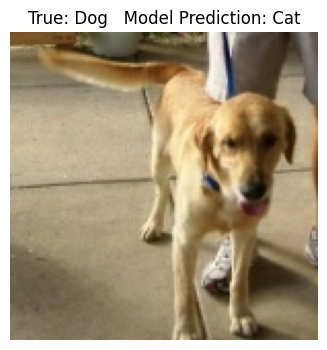

True Label: 0
Predicted Label: 0
Model Prediction Probabilities: [0.07640391]


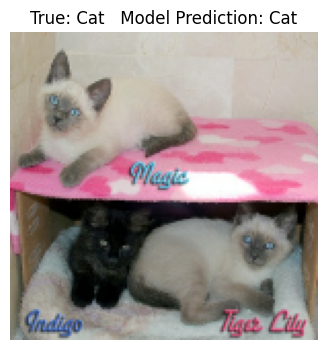

True Label: 1
Predicted Label: 0
Model Prediction Probabilities: [0.9735478]


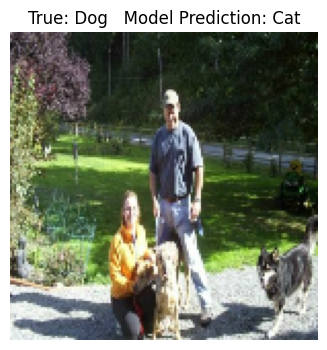

True Label: 1
Predicted Label: 0
Model Prediction Probabilities: [0.9999567]


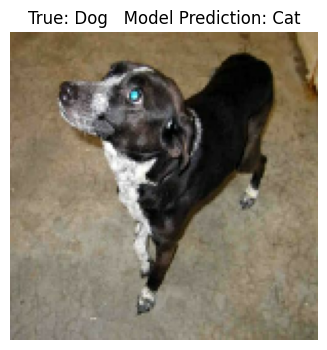

True Label: 1
Predicted Label: 0
Model Prediction Probabilities: [0.06709627]


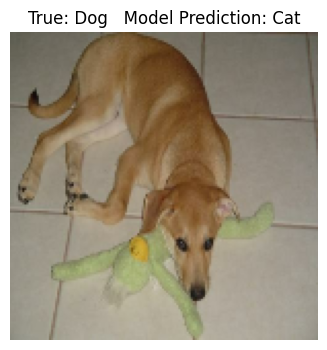

In [24]:
# sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))
# predictions = model.predict(sample_test_images)

# # 이미지 및 예측 결과 출력
# class_names = ['Cat', 'Dog']
# for i in range(5):
#     predicted_label = np.argmax(predictions[i])
#     true_label = int(sample_test_labels[i])

#     plt.figure(figsize=(8, 4))
#     plt.title('True: {}   Model Prediction: {}'.format(class_names[true_label], class_names[predicted_label]))
#     print("True Label:", true_label)
#     print("Predicted Label:", predicted_label)
#     print("Model Prediction Probabilities:", predictions[i])

#     plt.imshow(sample_test_images[i])
#     plt.axis('off')
#     plt.show()


In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 로드 및 전처리
(train_dataset, validation_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224,3))
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image, label

BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
validation_dataset = validation_dataset.map(preprocess_image).batch(BATCH_SIZE)

# ResNet50 모델 가져오기 (include_top=False로 Classifier 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224,3))

# Feature Extractor 부분은 학습을 멈추도록 설정
base_model.trainable = False

# 모델 생성 (Transfer Learning)
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_dataset, epochs=5, validation_data=validation_dataset)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
582/582 [==============================] - 111s 173ms/step - loss: 1.2516 - accuracy: 0.9737 - val_loss: 0.1309 - val_accuracy: 0.9871
Epoch 2/5
582/582 [==============================] - 112s 185ms/step - loss: 0.0811 - accuracy: 0.9889 - val_loss: 0.0945 - val_accuracy: 0.9869
Epoch 3/5
582/582 [==============================] - 109s 182ms/step - loss: 0.0640 - accuracy: 0.9915 - val_loss: 0.0959 - val_accuracy: 0.9890
Epoch 4/5
582/582 [==============================] - 96s 160ms/step - loss: 0.0387 - accuracy: 0.9942 - val_loss: 0.0862 - val_accuracy: 0.9882
Epoch 5/5
582/582 [==============================] - 98s 163ms/step - loss: 0.0229 - accuracy: 0.9953 - val_loss: 0.0924 - val_accuracy: 0.9877


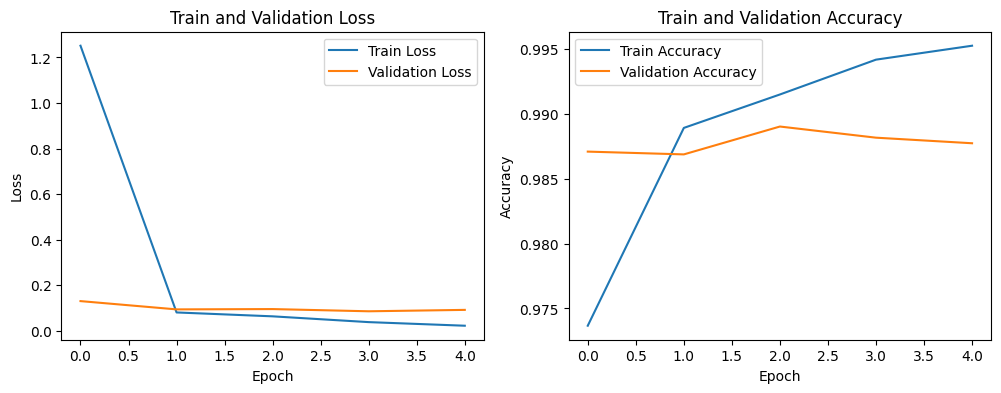

146/146 [==============================] - 19s 128ms/step - loss: 0.0924 - accuracy: 0.9877
Test Loss: 0.0924
Test Accuracy: 0.9877
1/1 [==============================] - 1s 918ms/step


1
[1.]


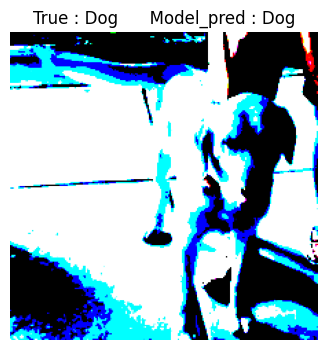

0
[5.1278435e-12]


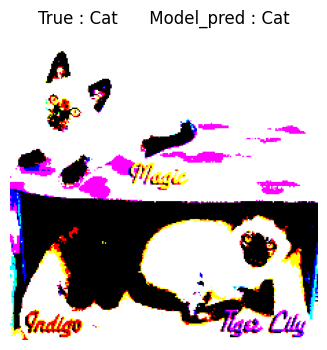

1
[1.]


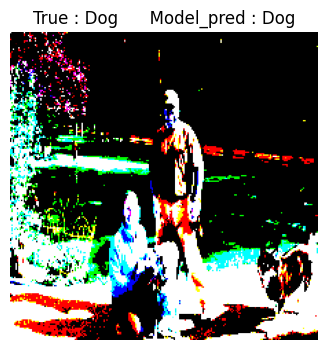

1
[1.]


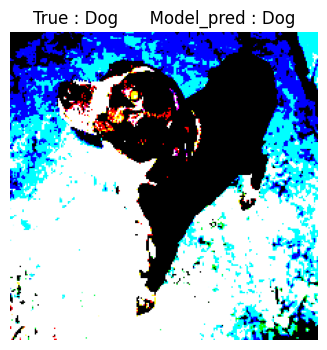

1
[0.99999976]


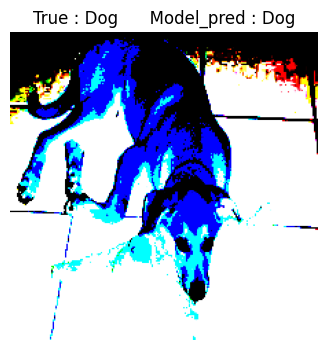

1
[1.]


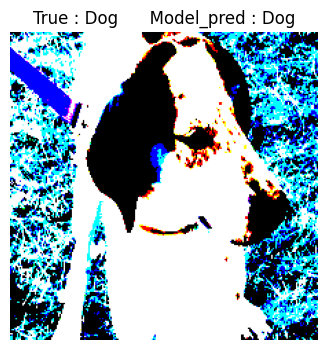

0
[6.744959e-28]


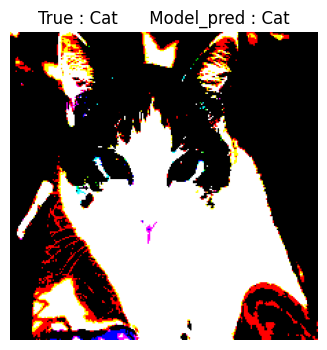

1
[1.]


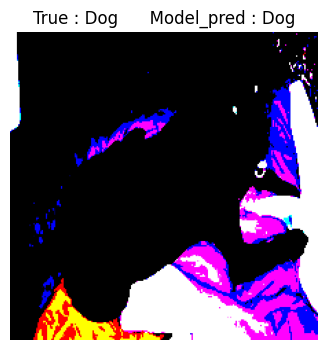

0
[0.01047205]


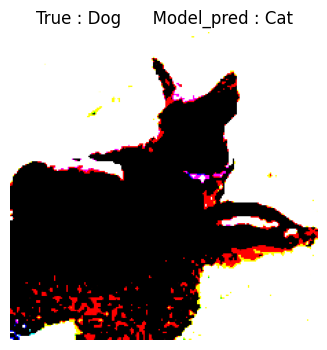

0
[6.05138e-28]


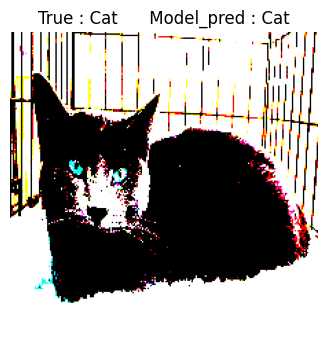

1
[1.]


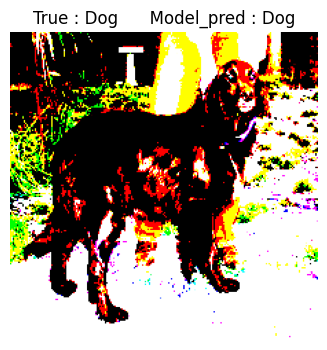

1
[1.]


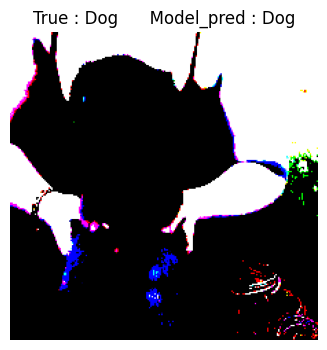

0
[6.8734773e-10]


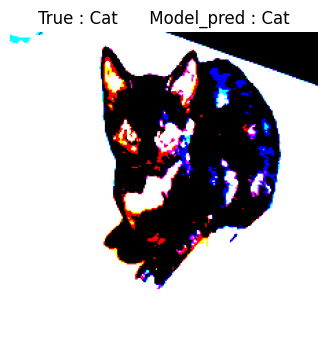

0
[0.]


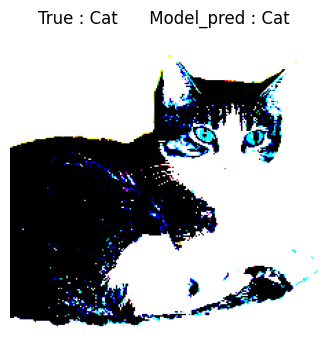

0
[5.9686995e-06]


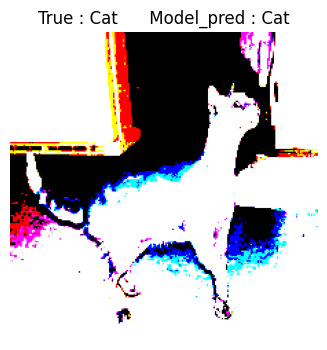

0
[4.437476e-22]


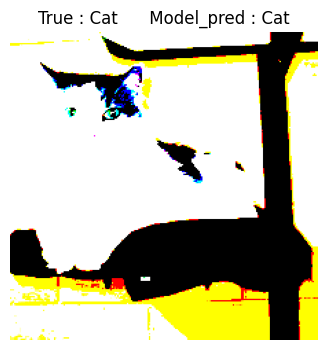

1
[1.]


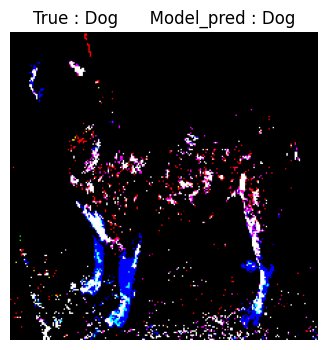

1
[1.]


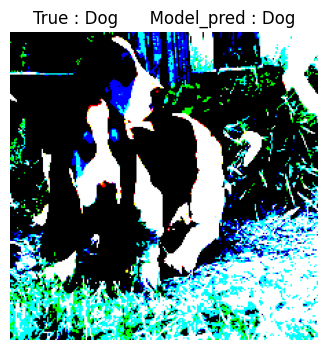

1
[0.9999999]


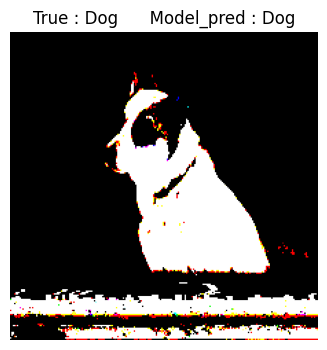

1
[1.]


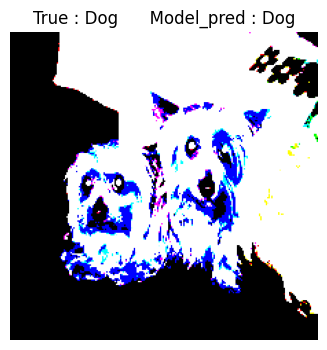

0
[1.9563857e-26]


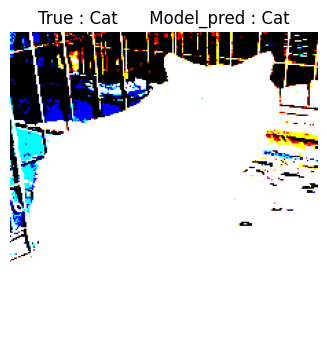

1
[1.]


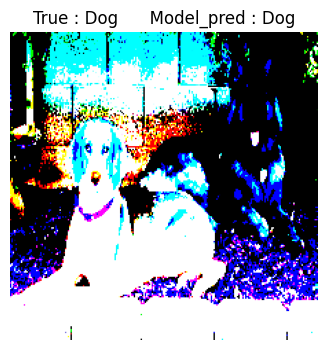

0
[1.7435104e-06]


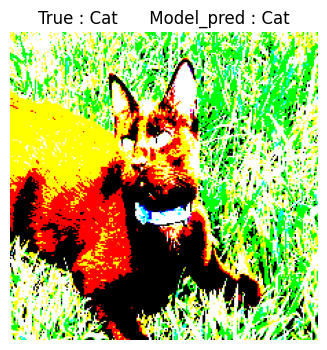

0
[1.4193273e-12]


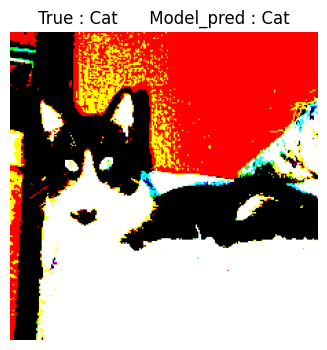

0
[0.]


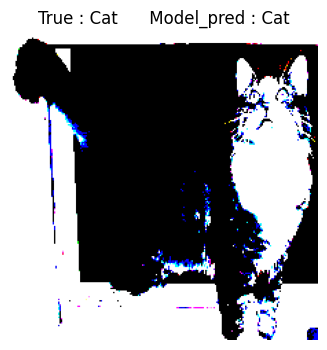

1
[1.]


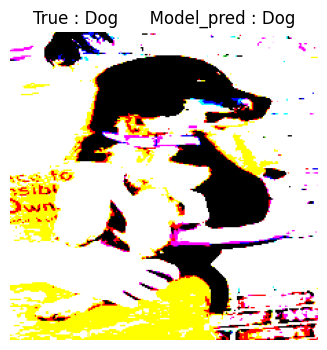

1
[1.]


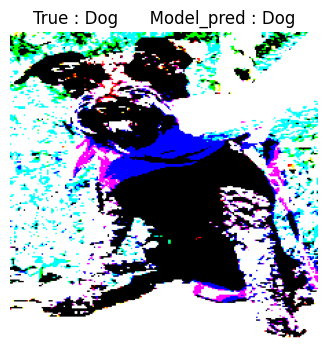

0
[0.]


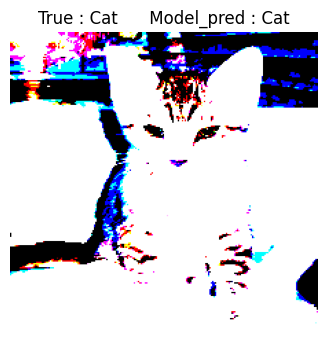

1
[1.]


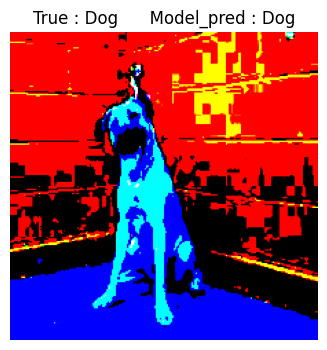

1
[1.]


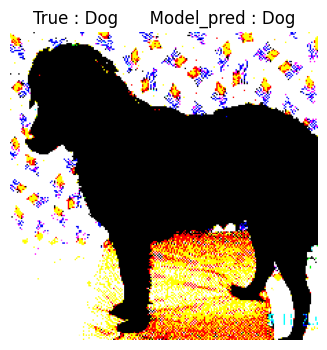

0
[5.7655568e-11]


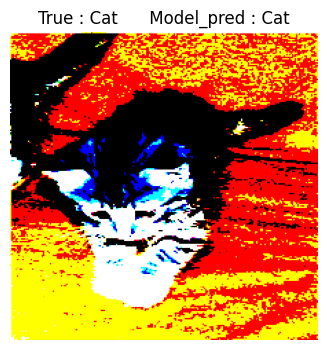

1
[1.]


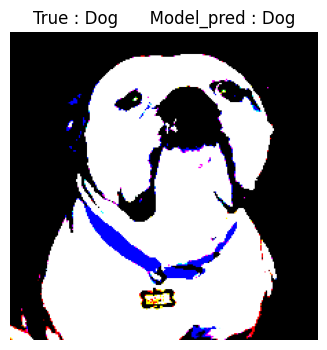

In [49]:
history_plot(history)
model_predict_example(model, validation_dataset,class_names =['Cat', 'Dog'])


In [55]:
import pandas as pd
df = pd.read_excel('./ThoraricSurgery.xlsx')
df.head()
colnames = list(df.columns)

In [57]:
df.head()

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0


In [58]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df1 = df
# 특성과 레이블 분리
X = df1.iloc[:, :-1].values  # 마지막 열을 제외한 모든 열은 특성
y = df1.iloc[:, -1].values   # 마지막 열은 레이블

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
10/10 [==============================] - 3s 26ms/step - loss: 0.5746 - accuracy: 0.7900 - val_loss: 0.4905 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.4728 - accuracy: 0.8533 - val_loss: 0.4799 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.4485 - accuracy: 0.8533 - val_loss: 0.4839 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.4259 - accuracy: 0.8533 - val_loss: 0.4798 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 0s 22ms/step - loss: 0.4003 - accuracy: 0.8533 - val_loss: 0.4748 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 0s 25ms/step - loss: 0.3897 - accuracy: 0.8567 - val_loss: 0.4760 - val_accuracy: 0.8400
Epoch 7/10
10/10 [==============================] - 0s 19ms/step - loss: 0.3980 - accuracy: 0.8533 - val_loss: 0.4771 - val_accuracy: 0.8267
Epoch 8/10
10/1

In [63]:
test_case = X_test[:20]
target_gt = y_test[:20]
pred_target = model.predict(test_case)

pred_label = []
for i in range(20):
  pred_label.append(1 if pred_target[i] >= 0.5 else 0)


print(pred_label)
print(target_gt)



1/1 [==============================] - 0s 29ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0]


In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 로드 및 전처리
(train_dataset, validation_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image, label

BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
validation_dataset = validation_dataset.map(preprocess_image).batch(BATCH_SIZE)

# ResNet50 모델 가져오기 (include_top=False로 Classifier 제외)
base_model = ResNet50(weights=None, include_top=True,classes = 1,classifier_activation='sigmoid', input_shape=(224, 224,3))


# 모델 생성 (Transfer Learning)
ResNet50_tr_top = base_model

# 모델 컴파일
ResNet50_tr_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history_ResNet50_tr_top = ResNet50_tr_top.fit(train_dataset, epochs=5, validation_data=validation_dataset)


Epoch 1/5
582/582 [==============================] - 260s 378ms/step - loss: 0.6828 - accuracy: 0.6346 - val_loss: 1.4732 - val_accuracy: 0.5623
Epoch 2/5
582/582 [==============================] - 217s 367ms/step - loss: 0.5811 - accuracy: 0.6971 - val_loss: 0.7830 - val_accuracy: 0.6028
Epoch 3/5
582/582 [==============================] - 220s 372ms/step - loss: 0.5236 - accuracy: 0.7463 - val_loss: 0.8739 - val_accuracy: 0.6737
Epoch 4/5
582/582 [==============================] - 219s 372ms/step - loss: 0.4678 - accuracy: 0.7849 - val_loss: 1.0537 - val_accuracy: 0.6199
Epoch 5/5
582/582 [==============================] - 220s 372ms/step - loss: 0.4021 - accuracy: 0.8203 - val_loss: 1.2254 - val_accuracy: 0.7212


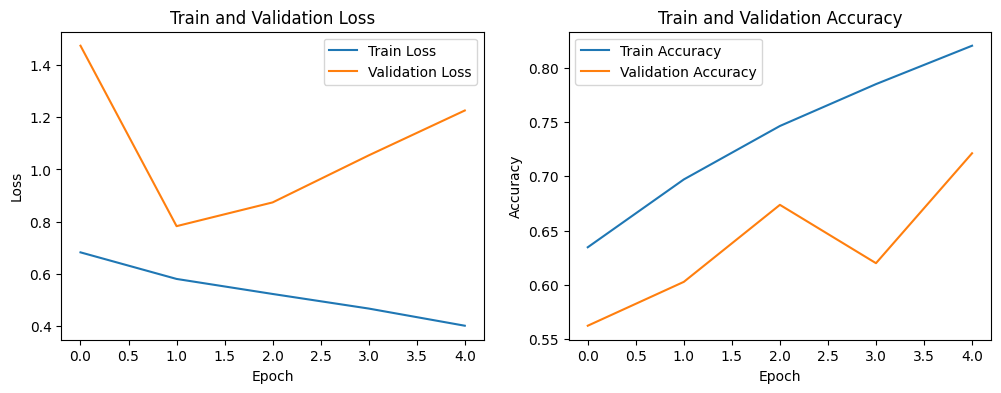

146/146 [==============================] - 20s 133ms/step - loss: 1.2254 - accuracy: 0.7212
Test Loss: 1.2254
Test Accuracy: 0.7212


1/1 [==============================] - 1s 952ms/step


1
[0.9999999]


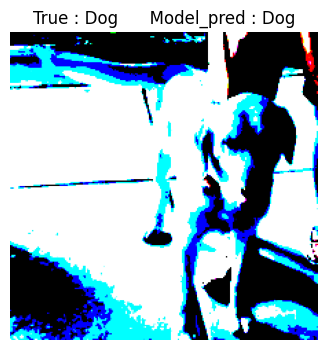

1
[0.96903497]


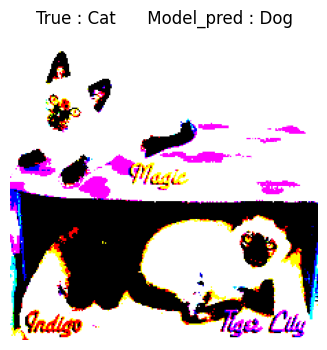

0
[0.33171085]


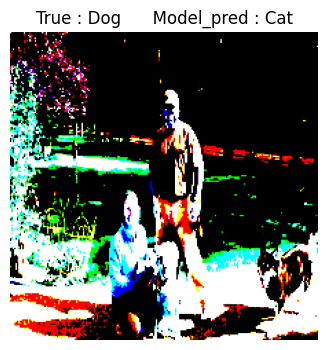

1
[0.98670703]


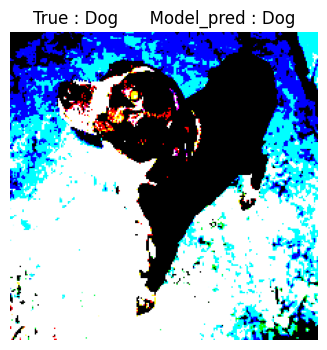

1
[0.9930928]


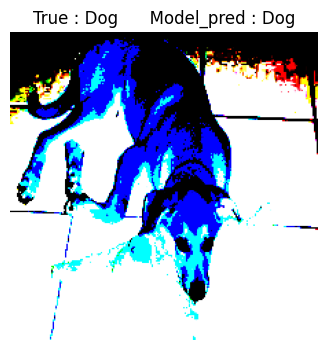

In [71]:
history_plot(history_ResNet50_tr_top)
model_predict_example(ResNet50_tr_top, validation_dataset,class_names =['Cat', 'Dog'])


In [ ]:
# plot_model(ResNet50_tr_top, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50,VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 로드 및 전처리
(train_dataset, validation_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image, label

BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
validation_dataset = validation_dataset.map(preprocess_image).batch(BATCH_SIZE)

# ResNet50 모델 가져오기 (include_top=False로 Classifier 제외)
base_model = ResNet50(weights=None, include_top=True,classes = 1,classifier_activation='sigmoid', input_shape=(224, 224,3))


# 모델 생성 (Transfer Learning)
ResNet50_tr_top = base_model

# 모델 컴파일
ResNet50_tr_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history_ResNet50_tr_top = ResNet50_tr_top.fit(train_dataset, epochs=5, validation_data=validation_dataset)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'coco/2017',
    split=['train', 'validation'],
    with_info=True,
    as_supervised=True,
)

# 전처리 함수 정의
def preprocess_data(image, bbox):
    # 이미지 크기 조정
    image = tf.image.resize(image, (224, 224))
    # 이미지를 [0, 1] 범위로 정규화
    image = image / 255.0
    # bounding box 좌표를 정규화 (예: [ymin, xmin, ymax, xmax])
    bbox = tf.stack([
        bbox['bbox_ymin'] / 224.0,
        bbox['bbox_xmin'] / 224.0,
        bbox['bbox_ymax'] / 224.0,
        bbox['bbox_xmax'] / 224.0,
    ], axis=-1)
    return image, bbox

# 데이터 전처리 및 배치 설정
BATCH_SIZE = 32
train_dataset = train_dataset.map(lambda x: (x['image'], x['objects'])).map(preprocess_data).batch(BATCH_SIZE)
test_dataset = test_dataset.map(lambda x: (x['image'], x['objects'])).map(preprocess_data).batch(BATCH_SIZE)

# Object Detection 모델 정의 (예: 간단한 YOLO 모델)
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='sigmoid')  # 4는 bounding box 좌표 (ymin, xmin, ymax, xmax)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')  # 회귀 문제이므로 Mean Squared Error를 사용

# 모델 학습
model.fit(train_dataset, epochs=1, validation_data=test_dataset)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예측을 위한 테스트 데이터 가져오기
sample_images, sample_bboxes = next(iter(test_dataset))

# 예측 수행
predictions = model.predict(sample_images)

# 시각화 함수 정의
def visualize_results(images, true_bboxes, pred_bboxes):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_bboxes[i]} \n Pred: {pred_bboxes[i]}')
        plt.axis('off')
    plt.show()

# 정규화된 bounding box를 원래 크기로 변환하는 함수
def denormalize_bbox(bbox, image_shape):
    ymin, xmin, ymax, xmax = bbox
    height, width, _ = image_shape
    return [int(ymin * height), int(xmin * width), int(ymax * height), int(xmax * width)]

# 시각화를 위한 정규화된 예측 bounding box와 실제 bounding box 추출
normalized_pred_bboxes = predictions[:len(sample_bboxes)]
true_bboxes = [denormalize_bbox(bbox.numpy(), sample_images.shape[1:]) for bbox in sample_bboxes]
pred_bboxes = [denormalize_bbox(bbox, sample_images.shape[1:]) for bbox in normalized_pred_bboxes]

# 결과 시각화
visualize_results(sample_images.numpy(), true_bboxes, pred_bboxes)
